# [01] Models & Tokenizers


In [ ]:
from transformers import AutoTokenizer

In [ ]:
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
tokenizer("hello world")

{'input_ids': [101, 7592, 2088, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [ ]:
tokens = tokenizer.tokenize("hello world")
tokens

['hello', 'world']

In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)
ids

[7592, 2088]

In [ ]:
tokenizer.convert_ids_to_tokens(ids)

['hello', 'world']

In [ ]:
tokenizer.decode(ids)

'hello world'

In [ ]:
ids = tokenizer.encode("hello world")
ids

[101, 7592, 2088, 102]

In [ ]:
tokenizer.convert_ids_to_tokens(ids)

['[CLS]', 'hello', 'world', '[SEP]']

In [ ]:
tokenizer.decode(ids)

'[CLS] hello world [SEP]'

In [ ]:
model_inputs = tokenizer("hello world")
model_inputs

{'input_ids': [101, 7592, 2088, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [ ]:
data = [
    "I like cats.",
    "Do you like cats too?",
]
tokenizer(data)

{'input_ids': [[101, 1045, 2066, 8870, 1012, 102], [101, 2079, 2017, 2066, 8870, 2205, 1029, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_inputs = tokenizer("hello world", return_tensors="pt")
model_inputs

{'input_ids': tensor([[ 101, 7592, 2088,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

In [ ]:
# the default was to create a binary classifier!
outputs = model(**model_inputs)
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-0.0749, -0.0879]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint, num_labels=3
)

outputs = model(**model_inputs)
outputs

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SequenceClassifierOutput(loss=None, logits=tensor([[ 0.5429,  0.0469, -0.1637]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
outputs.logits

tensor([[ 0.5429,  0.0469, -0.1637]], grad_fn=<AddmmBackward0>)

In [ ]:
outputs['logits']

tensor([[ 0.5429,  0.0469, -0.1637]], grad_fn=<AddmmBackward0>)

In [ ]:
outputs[0]

tensor([[ 0.5429,  0.0469, -0.1637]], grad_fn=<AddmmBackward0>)

In [ ]:
outputs.logits.detach().cpu().numpy()

array([[ 0.54289234,  0.04690734, -0.1637266 ]], dtype=float32)

In [ ]:
data = [
    "I like cats.",
    "Do you like cats too?",
]

model_inputs = tokenizer(
    data, padding=True, truncation=True, return_tensors='pt'
)

model_inputs

{'input_ids': tensor([[ 101, 1045, 2066, 8870, 1012,  102,    0,    0],
        [ 101, 2079, 2017, 2066, 8870, 2205, 1029,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
model_inputs['input_ids']

tensor([[ 101, 1045, 2066, 8870, 1012,  102,    0,    0],
        [ 101, 2079, 2017, 2066, 8870, 2205, 1029,  102]])

In [ ]:
model_inputs['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
outputs = model(**model_inputs)
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.5404, -0.0914, -0.2201],
        [ 0.4861, -0.1043, -0.2460]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

#[02] Fine-Tuning Sentiment Analysis

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
import numpy as np

In [ ]:
raw_datasets = load_dataset("glue", "sst2")

raw_datasets

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [ ]:
raw_datasets['train']

Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 67349
})

In [ ]:
dir(raw_datasets['train'])

In [ ]:
type(raw_datasets['train'])

datasets.arrow_dataset.Dataset

In [ ]:
raw_datasets['train'].data

MemoryMappedTable
sentence: string
label: int64
idx: int32
----
sentence: [["hide new secretions from the parental units ","contains no wit , only labored gags ","that loves its characters and communicates something rather beautiful about human nature ","remains utterly satisfied to remain the same throughout ","on the worst revenge-of-the-nerds clichés the filmmakers could dredge up ",...,"you wish you were at home watching that movie instead of in the theater watching this one ","'s no point in extracting the bare bones of byatt 's plot for purposes of bland hollywood romance ","underdeveloped ","the jokes are flat ","a heartening tale of small victories "],["suspense , intriguing characters and bizarre bank robberies , ","a gritty police thriller with all the dysfunctional family dynamics one could wish for ","with a wonderful ensemble cast of characters that bring the routine day to day struggles of the working class to life ","nonetheless appreciates the art and reveals a music sc

In [ ]:
raw_datasets['train'][0]

{'sentence': 'hide new secretions from the parental units ',
 'label': 0,
 'idx': 0}

In [ ]:
raw_datasets['train'][50000:50003]

{'sentence': ['glow ',
  'a classical dramatic animated feature ',
  'best espionage picture '],
 'label': [1, 1, 1],
 'idx': [50000, 50001, 50002]}

In [ ]:
raw_datasets['train'].features

{'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(names=['negative', 'positive'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [ ]:
from transformers import AutoTokenizer

# checkpoint = "bert-base-uncased"
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
tokenized_sentences = tokenizer(raw_datasets['train'][:3]['sentence'])

from pprint import pprint
pprint(tokenized_sentences)

{'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'input_ids': [[101, 5342, 2047, 3595, 8496, 2013, 1996, 18643, 3197, 102],
               [101,
                3397,
                2053,
                15966,
                1010,
                2069,
                4450,
                2098,
                18201,
                2015,
                102],
               [101,
                2008,
                7459,
                2049,
                3494,
                1998,
                10639,
                2015,
                2242,
                2738,
                3376,
                2055,
                2529,
                3267,
                102]]}


In [ ]:
def tokenize_fn(batch):
    return tokenizer(batch['sentence'], truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_fn, batched=True)

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In [ ]:
!pip install transformers[torch]

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    'my_trainer',
    eval_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=1,
)

from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=2
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
type(model)

transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification

In [ ]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
%%capture
!pip install torchinfo

In [ ]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              23,440,896
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           1,538
├─Dropout: 1-4                                          --
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0

In [ ]:
summary(model, input_size=(16, 512), dtypes=['torch.IntTensor'], device='cpu')

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Layer (type:depth-idx)                                  Output Shape              Param #
DistilBertForSequenceClassification                     [16, 2]                   --
├─DistilBertModel: 1-1                                  [16, 512, 768]            --
│    └─Embeddings: 2-1                                  [16, 512, 768]            --
│    │    └─Embedding: 3-1                              [16, 512, 768]            23,440,896
│    │    └─Embedding: 3-2                              [1, 512, 768]             393,216
│    │    └─LayerNorm: 3-3                              [16, 512, 768]            1,536
│    │    └─Dropout: 3-4                                [16, 512, 768]            --
│    └─Transformer: 2-2                                 [16, 512, 768]            --
│    │    └─ModuleList: 3-5                             --                        42,527,232
├─Linear: 1-2                                           [16, 768]                 590,592
├─Dropout: 1-3                 

In [ ]:
params_before = []
for name, p in model.named_parameters():
    params_before.append(p.detach().cpu().numpy())

In [ ]:
from transformers import Trainer
from datasets import load_metric

metric = load_metric("glue", "sst2")

metric.compute(predictions=[1, 0, 1], references=[1, 0, 0])

<ipython-input-15-8f9f5ea6ad21>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("glue", "sst2")


The repository for glue contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/glue.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


{'accuracy': 0.6666666666666666}

In [ ]:
def compute_metrics(logits_and_labels):
    # metric = load_metric("glue", "sst2")
    logits,  labels = logits_and_labels
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets['train'],
    eval_dataset = tokenized_datasets['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.204300,0.368658,0.894495


TrainOutput(global_step=8419, training_loss=0.26793468659755837, metrics={'train_runtime': 480.6829, 'train_samples_per_second': 140.111, 'train_steps_per_second': 17.515, 'total_flos': 517212489917652.0, 'train_loss': 0.26793468659755837, 'epoch': 1.0})

In [ ]:
trainer.save_model("my_saved_model")

In [ ]:
!ls

my_saved_model	my_trainer  sample_data


In [ ]:
!ls my_saved_model

config.json	   special_tokens_map.json  tokenizer.json     vocab.txt
model.safetensors  tokenizer_config.json    training_args.bin


In [ ]:
from transformers import pipeline

newmodel = pipeline('text-classification', model='my_saved_model', device=0)

newmodel('This movie is great!')

[{'label': 'LABEL_1', 'score': 0.9996464252471924}]

In [ ]:
newmodel('This movie sucks')

[{'label': 'LABEL_0', 'score': 0.9974827170372009}]

In [ ]:
!cat my_saved_model/config.json

{
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.41.2",
  "vocab_size": 30522
}


In [ ]:
import json

config_path = 'my_saved_model/config.json'

with open(config_path) as f:
    j = json.load(f)

In [ ]:
j['id2label'] = {0:'negative', 1:'positive'}

with open(config_path, 'w') as f:
    json.dump(j, f, indent=2)

In [ ]:
!cat my_saved_model/config.json

{
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.41.2",
  "vocab_size": 30522,
  "id2label": {
    "0": "negative",
    "1": "positive"
  }
}

In [ ]:
newmodel = pipeline('text-classification', model='my_saved_model', device=0)

newmodel('This movie is great!')

[{'label': 'positive', 'score': 0.9996464252471924}]

In [ ]:
params_after = []
for name, p in model.named_parameters():
    params_after.append(p.detach().cpu().numpy())

for p1, p2 in zip(params_before, params_after):
    print(np.sum(np.abs(p1 - p2)))

#[03] Fine-Tuning Sentiment Custom Dataset

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-06-30 12:25:01--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  --.-KB/s    in 0.05s   

2024-06-30 12:25:01 (61.8 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import torch

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
df_ = pd.read_csv('AirlineTweets.csv')

df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df = df_[['airline_sentiment', 'text']].copy()

df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

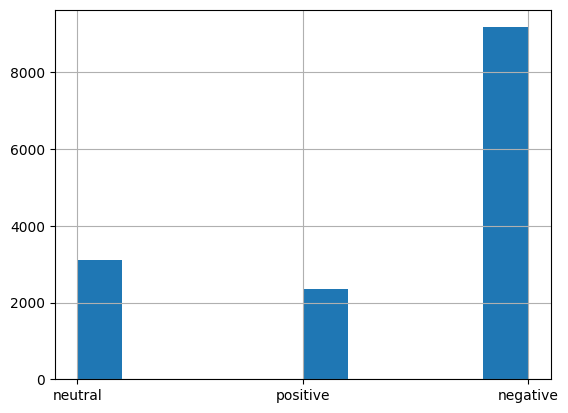

In [ ]:
df['airline_sentiment'].hist()

In [ ]:
target_map = {'positive':1, 'negative':0, 'neutral':2}
df['target'] = df['airline_sentiment'].map(target_map)

In [ ]:
df2 = df[['text', 'target']]
df2.head()

,text,target
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [ ]:
df2.columns

Index(['text', 'target'], dtype='object')

In [ ]:
df2.columns = ['sentence', 'label']
df2.to_csv('data.csv', index=False)

In [ ]:
!head data.csv

sentence,label
@VirginAmerica What @dhepburn said.,2
@VirginAmerica plus you've added commercials to the experience... tacky.,1
@VirginAmerica I didn't today... Must mean I need to take another trip!,2
"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
@VirginAmerica and it's a really big bad thing about it,0
"@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA",0
"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",1
"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",2


In [ ]:
%%capture
!pip install datasets

In [ ]:
%%capture
!pip install transformers[torch]

In [ ]:
from datasets import load_dataset
raw_dataset = load_dataset('csv', data_files='data.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

In [ ]:
split = raw_dataset['train'].train_test_split(test_size=0.3, seed=42)
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

In [ ]:
# if you have multiple csv files
# load_dataset('csv', data_files=['file1.csv', 'file2.csv'])

In [ ]:
# if you already have a train-test split:
# load_dataset(
#     'csv',
#     data_files={'train':['train1.csv', 'train2.csv'],
#                 'test':'test.csv'}
# )

In [ ]:
checkpoint = 'distilbert-base-cased'

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
def tokenize_fn(batch):
    return tokenizer(batch['sentence'], truncation=True)

tokenized_datasets = split.map(tokenize_fn, batched=True)

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint, num_labels=3
)

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
%%capture
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           2,307
├─Dropout: 1-4                                          --
Total params: 65,783,811
Trainable params: 65,783,811
Non-trainable params: 0

In [ ]:
training_args = TrainingArguments(
    output_dir='training_dir',
    eval_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
)

In [ ]:
def compute_metrics(logits_and_labels):
    logits, labels = logits_and_labels
    predictions = np.argmax(logits, axis=-1)
    acc = np.mean(predictions==labels)
    f1 = f1_score(labels, predictions, average='macro')
    return {'accuracy':acc, 'f1':f1}

In [ ]:
trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets['train'],
    eval_dataset = tokenized_datasets['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.542400,0.453474,0.827869,0.764771
2,0.348300,0.480541,0.836521,0.776414
3,0.251300,0.599695,0.834927,0.784016


TrainOutput(global_step=1923, training_loss=0.330577193729839, metrics={'train_runtime': 126.456, 'train_samples_per_second': 243.12, 'train_steps_per_second': 15.207, 'total_flos': 388537948763424.0, 'train_loss': 0.330577193729839, 'epoch': 3.0})

In [ ]:
!ls training_dir

checkpoint-1282  checkpoint-1923  checkpoint-641  runs


In [ ]:
from transformers import pipeline

In [ ]:
savedmodel = pipeline('text-classification',
                     model='training_dir/checkpoint-1282',
                     device=0)

In [ ]:
split['test']

Dataset({
    features: ['sentence', 'label'],
    num_rows: 4392
})

In [ ]:
test_pred = savedmodel(split['test']['sentence'])

In [ ]:
def get_label(d):
    return int(d['label'].split('_')[1])

In [ ]:
test_pred = [get_label(d) for d in test_pred]

In [ ]:
print("acc:", accuracy_score(split['test']['label'], test_pred))

acc: 0.8365209471766849


In [ ]:
print("f1:", f1_score(split['test']['label'], test_pred, average='macro'))

f1: 0.7764139661107343


In [ ]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrics are plotted
def plot_cm(cm):
    classes = ['negative', 'positive', 'neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Target')

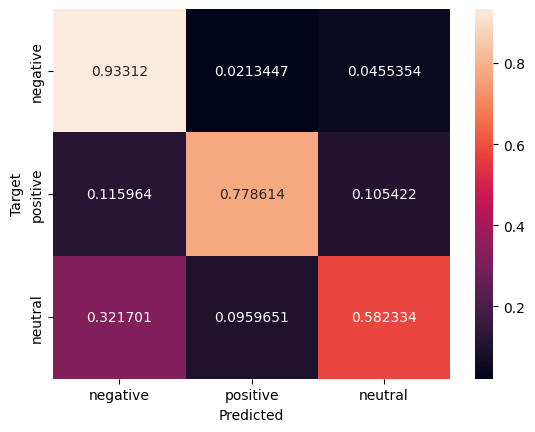

In [ ]:
cm = confusion_matrix(split['test']['label'], test_pred, normalize='true')
plot_cm(cm)

#[04] Fine-Tuning Sentiment Custom Dataset + Labels

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig, Trainer, TrainingArguments

In [ ]:
config = AutoConfig.from_pretrained(checkpoint)
config

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


DistilBertConfig {
  "_name_or_path": "distilbert-base-cased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.41.2",
  "vocab_size": 28996
}

In [ ]:
config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

In [ ]:
config.label2id

{'LABEL_0': 0, 'LABEL_1': 1}

In [ ]:
config.id2label = {v:k for k, v in target_map.items()}
config.label2id = target_map

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint, config=config
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           2,307
├─Dropout: 1-4                                          --
Total params: 65,783,811
Trainable params: 65,783,811
Non-trainable params: 0

In [ ]:
training_args = TrainingArguments(
    output_dir='training_dir',
    eval_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
)

In [ ]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.548200,0.452798,0.826958,0.762087
2,0.348000,0.472686,0.835838,0.776946
3,0.250400,0.591324,0.839253,0.788387


TrainOutput(global_step=1923, training_loss=0.33287415328400244, metrics={'train_runtime': 128.7774, 'train_samples_per_second': 238.737, 'train_steps_per_second': 14.933, 'total_flos': 388537948763424.0, 'train_loss': 0.33287415328400244, 'epoch': 3.0})

In [ ]:
!ls training_dir

checkpoint-1282  checkpoint-1923  checkpoint-641  runs


In [ ]:
savedmodel = pipeline('text-classification',
                      model='training_dir/checkpoint-1282',
                      device=0)

In [ ]:
s = split['test']['sentence'][0]
print(s)
savedmodel(s)

@JetBlue thank you!


[{'label': 'positive', 'score': 0.9218324422836304}]

#[05] Fine-Tuning with Multiple Inputs (Textual Entailment)

In [ ]:
# The Recognizing Textual Entailment (RTE) datasts come from a series of annual
# textual entailment challenges. We combine the data from RTE1, RTE2, RTE3, and RTE5.
# 4 Examples are constructed based on news and Wikipedia text. We convert all datasets to a two-class split,
# where for three-class datasets we collapse neutral and contradiction into not entailment, for consistency.
raw_datasets = load_dataset("glue", 'rte')

Generating train split:   0%|          | 0/2490 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/277 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3000
    })
})

In [ ]:
raw_datasets['train'].features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['entailment', 'not_entailment'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [ ]:
raw_datasets['train']['sentence1'][:10]

['No Weapons of Mass Destruction Found in Iraq Yet.',
 'A place of sorrow, after Pope John Paul II died, became a place of celebration, as Roman Catholic faithful gathered in downtown Chicago to mark the installation of new Pope Benedict XVI.',
 'Herceptin was already approved to treat the sickest breast cancer patients, and the company said, Monday, it will discuss with federal regulators the possibility of prescribing the drug for more breast cancer patients.',
 'Judie Vivian, chief executive at ProMedica, a medical service company that helps sustain the 2-year-old Vietnam Heart Institute in Ho Chi Minh City (formerly Saigon), said that so far about 1,500 children have received treatment.',
 "A man is due in court later charged with the murder 26 years ago of a teenager whose case was the first to be featured on BBC One's Crimewatch. Colette Aram, 16, was walking to her boyfriend's house in Keyworth, Nottinghamshire, on 30 October 1983 when she disappeared. Her body was later found i

In [ ]:
checkpoint = 'distilbert-base-cased'

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer(
    raw_datasets['train']['sentence1'][0],
    raw_datasets['train']['sentence2'][0]
)

{'input_ids': [101, 1302, 20263, 1104, 8718, 14177, 17993, 17107, 1107, 5008, 6355, 119, 102, 20263, 1104, 8718, 14177, 17993, 17107, 1107, 5008, 119, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
result = _

In [ ]:
# distilbert doesn't use token_type_ids
result.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
tokenizer.decode(result['input_ids'])

'[CLS] No Weapons of Mass Destruction Found in Iraq Yet. [SEP] Weapons of Mass Destruction Found in Iraq. [SEP]'

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint, num_labels=2
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir='training_dir',
    eval_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    logging_steps=150, # otherwise, 'no log' will appear under training loss
)

In [ ]:
from datasets import load_metric

In [ ]:
metric = load_metric('glue', 'rte')

metric.compute(predictions=[1,0,1], references=[1,0,0])

<ipython-input-65-a454b2fa1e02>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('glue', 'rte')


The repository for glue contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/glue.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


{'accuracy': 0.6666666666666666}

In [ ]:
def tokenize_fn(batch):
    return tokenizer(batch['sentence1'], batch['sentence2'], truncation=True)

In [ ]:
tokenized_datasets = raw_datasets.map(tokenize_fn, batched=True)

Map:   0%|          | 0/2490 [00:00<?, ? examples/s]

Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.695600,0.693187,0.519856,0.417745
2,0.655600,0.728328,0.523466,0.517422
3,0.416800,0.908311,0.552347,0.552294
4,0.226300,1.331076,0.566787,0.566510
5,0.119600,1.749629,0.555957,0.552598


TrainOutput(global_step=780, training_loss=0.4100560001837902, metrics={'train_runtime': 109.1064, 'train_samples_per_second': 114.109, 'train_steps_per_second': 7.149, 'total_flos': 542121276647352.0, 'train_loss': 0.4100560001837902, 'epoch': 5.0})